# Importing Libraries

In [2]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
n_samples = 1000
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [6]:
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [7]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

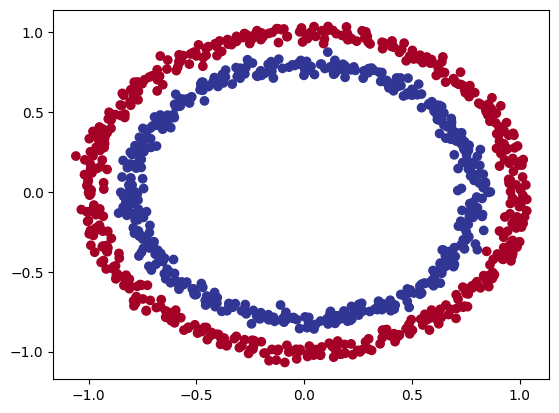

In [8]:
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [9]:
print(X)
X.shape, y.shape

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 ...
 [-0.13690036 -0.81001183]
 [ 0.67036156 -0.76750154]
 [ 0.28105665  0.96382443]]


((1000, 2), (1000,))

In [10]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(
    f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [11]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [12]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [14]:

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [15]:

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [16]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=2, out_features=5)
        self.fc2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        return self.fc2(self.fc1(x))


model_0 = CircleModel().to(device)
model_0

CircleModel(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
next(model_0.parameters()).device

device(type='cuda', index=0)

# Replicating with Sequential

In [18]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1185,  0.4512],
                      [-0.6535,  0.4468],
                      [-0.7010, -0.0217],
                      [ 0.5540,  0.3830],
                      [ 0.3511,  0.4181]], device='cuda:0')),
             ('0.bias',
              tensor([-0.1703, -0.6156, -0.4107, -0.3791,  0.0045], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2988, -0.3746, -0.2752,  0.3599, -0.1074]], device='cuda:0')),
             ('1.bias', tensor([0.3808], device='cuda:0'))])

# Making Predictions

In [20]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(
    f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [21]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

# Loss and Optimizer

In [22]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

# Accuracy

In [23]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [24]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.2614],
        [0.4530],
        [0.2562],
        [0.2608],
        [1.0450]], device='cuda:0')

In [25]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [26]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5650],
        [0.6113],
        [0.5637],
        [0.5648],
        [0.7398]], device='cuda:0')

In [27]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [28]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [29]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 100
model_0.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for i in range(epochs):
    model_0.train()
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happenin'
    if i % 10 == 0:
        print(
            f"Epoch: {i} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
print(f"Epoch: {epochs} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.76393, Acc: 54.25% | Test loss: 0.75705, Test acc: 56.00%
Epoch: 10 | Loss: 0.72144, Acc: 55.25% | Test loss: 0.72079, Test acc: 52.50%
Epoch: 20 | Loss: 0.70588, Acc: 51.50% | Test loss: 0.70739, Test acc: 53.00%
Epoch: 30 | Loss: 0.69977, Acc: 51.62% | Test loss: 0.70196, Test acc: 50.50%
Epoch: 40 | Loss: 0.69711, Acc: 50.62% | Test loss: 0.69944, Test acc: 50.50%
Epoch: 50 | Loss: 0.69580, Acc: 50.00% | Test loss: 0.69806, Test acc: 51.50%
Epoch: 60 | Loss: 0.69504, Acc: 49.50% | Test loss: 0.69718, Test acc: 51.00%
Epoch: 70 | Loss: 0.69456, Acc: 49.88% | Test loss: 0.69655, Test acc: 50.50%
Epoch: 80 | Loss: 0.69421, Acc: 49.88% | Test loss: 0.69607, Test acc: 50.50%
Epoch: 90 | Loss: 0.69396, Acc: 49.62% | Test loss: 0.69569, Test acc: 50.00%
Epoch: 100 | Loss: 0.69378, Acc: 50.00% | Test loss: 0.69542, Test acc: 50.00%


In [30]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get(
        "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

# Plot the Decision Boundary

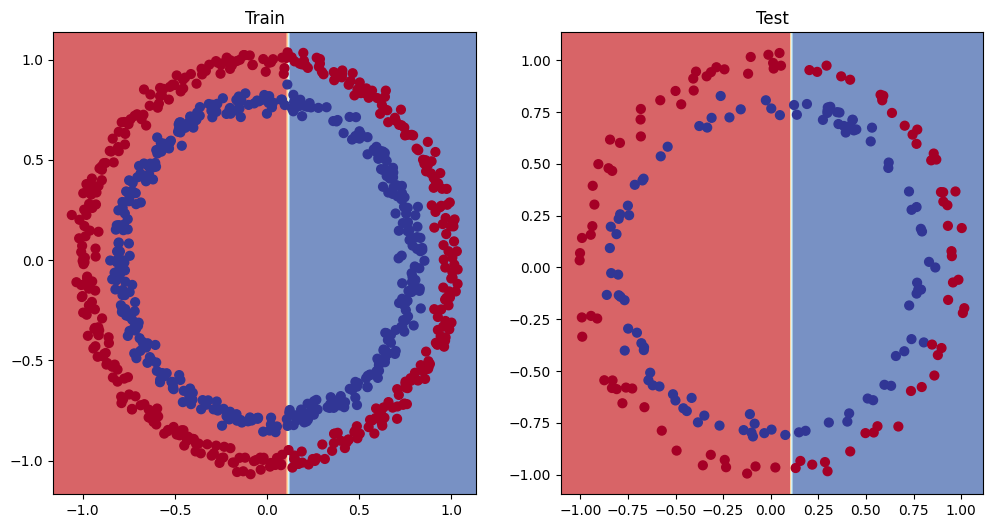

In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# Trying to Optimize the model

In [32]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        # this way of writing operations leverages speed ups where possible behind the scenes
        return self.layer_3(self.layer_2(self.layer_1(x)))


model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [33]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [34]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
model_1.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs+1):
    # Training
    model_1.train()
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    # logits -> pred probabilities -> prediction labels
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss/acc
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    # Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calculate loss
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
    if epoch % 100 == 0:
        print(
            f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Acc: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.62% | Test loss: 0.69458, Test acc: 45.00%


Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 1000 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%


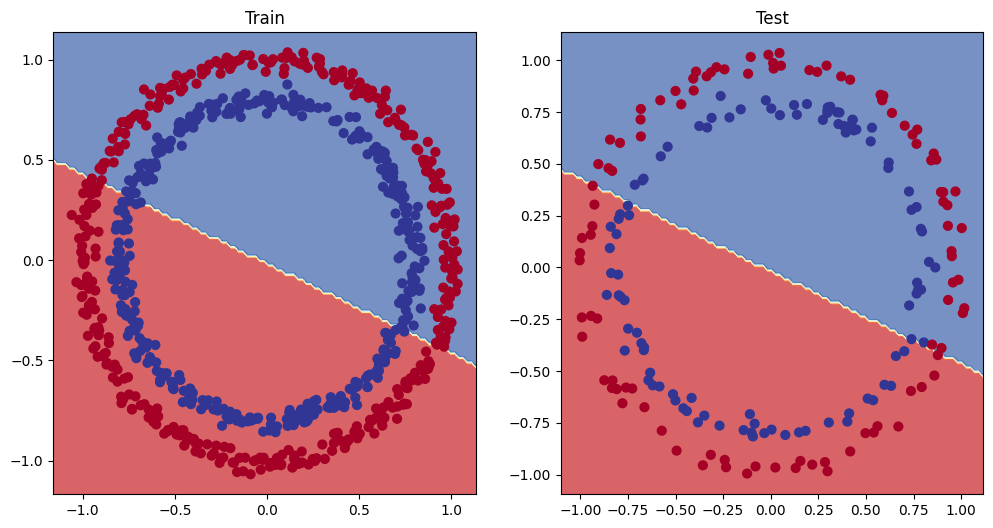

In [35]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

# Trying to Fit a linear data using the trained model

In [36]:
weight = 0.7
bias = 0.3
X_regression = torch.arange(0, 1, 0.01).unsqueeze(dim=1)
y_regression = weight * X_regression + bias
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [37]:
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:
                                                      train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(
    y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

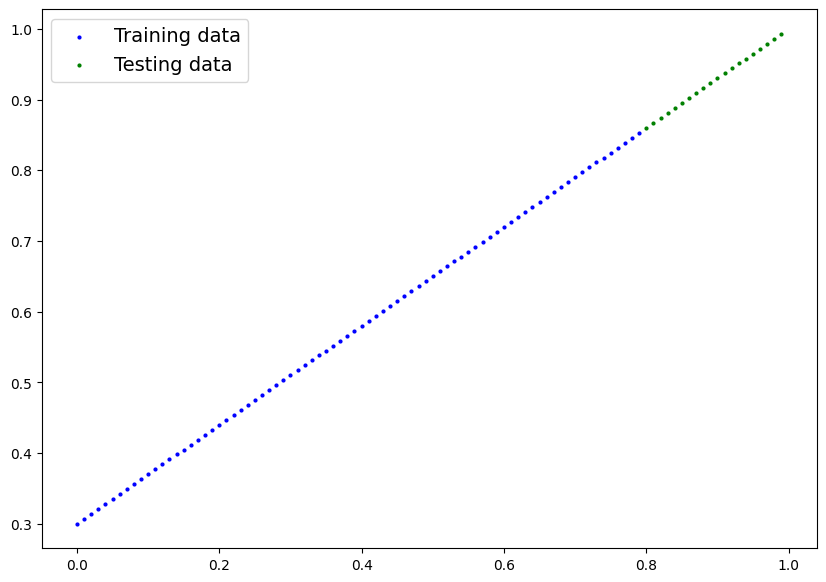

In [38]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [39]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [40]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.001)

In [41]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(
    device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(
    device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)

    if epoch % 100 == 0:
        print(
            f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test loss: 0.94965
Epoch: 100 | Loss: 0.40272 | Test loss: 0.54029
Epoch: 200 | Loss: 0.05876 | Test loss: 0.13480
Epoch: 300 | Loss: 0.01461 | Test loss: 0.03342
Epoch: 400 | Loss: 0.00308 | Test loss: 0.00008
Epoch: 500 | Loss: 0.00303 | Test loss: 0.00008
Epoch: 600 | Loss: 0.00304 | Test loss: 0.00012
Epoch: 700 | Loss: 0.00304 | Test loss: 0.00017
Epoch: 800 | Loss: 0.00294 | Test loss: 0.00011
Epoch: 900 | Loss: 0.00294 | Test loss: 0.00015


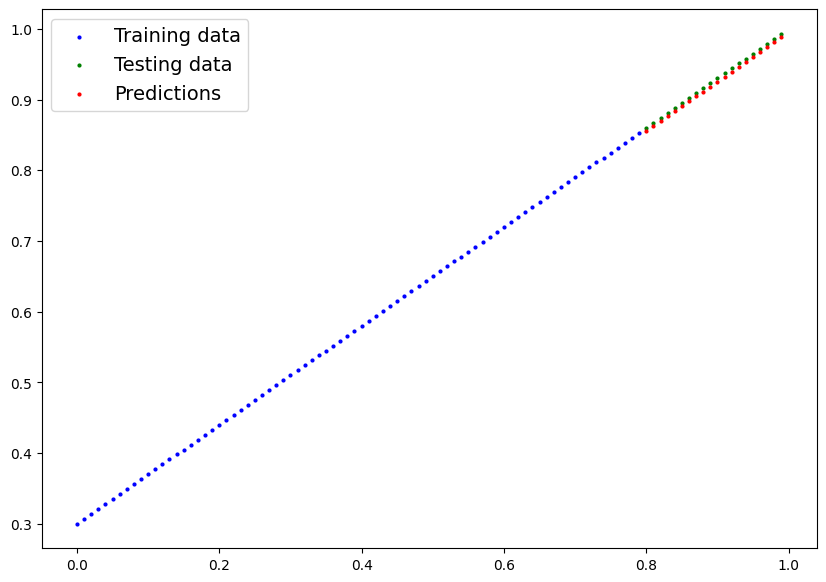

In [42]:
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

# Non Linear Model

In [43]:
'''class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() #To add non-linearity
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_3 = CircleModelV2().to(device)
model_3'''

model_3 = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_3

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
)

In [44]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [45]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 2000
model_3.to(device)
# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs+1):
    # Training
    model_3.train()
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    # logits -> pred probabilities -> prediction labels
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss/acc
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    # Testing
    model_3.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calculate loss
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
    if epoch % 100 == 0:
        print(
            f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Acc: 50.00% | Test loss: 0.69319, Test acc: 50.00%
Epoch: 100 | Loss: 0.69115, Acc: 52.88% | Test loss: 0.69102, Test acc: 52.50%
Epoch: 200 | Loss: 0.68977, Acc: 53.37% | Test loss: 0.68940, Test acc: 55.00%
Epoch: 300 | Loss: 0.68795, Acc: 53.00% | Test loss: 0.68723, Test acc: 56.00%
Epoch: 400 | Loss: 0.68517, Acc: 52.75% | Test loss: 0.68411, Test acc: 56.50%
Epoch: 500 | Loss: 0.68102, Acc: 52.75% | Test loss: 0.67941, Test acc: 56.50%
Epoch: 600 | Loss: 0.67515, Acc: 54.50% | Test loss: 0.67285, Test acc: 56.00%
Epoch: 700 | Loss: 0.66659, Acc: 58.38% | Test loss: 0.66322, Test acc: 59.00%
Epoch: 800 | Loss: 0.65160, Acc: 64.00% | Test loss: 0.64757, Test acc: 67.50%
Epoch: 900 | Loss: 0.62362, Acc: 74.00% | Test loss: 0.62145, Test acc: 79.00%
Epoch: 1000 | Loss: 0.56818, Acc: 87.75% | Test loss: 0.57378, Test acc: 86.50%
Epoch: 1100 | Loss: 0.48153, Acc: 93.50% | Test loss: 0.49935, Test acc: 90.50%
Epoch: 1200 | Loss: 0.37056, Acc: 97.75% | Test loss

In [46]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

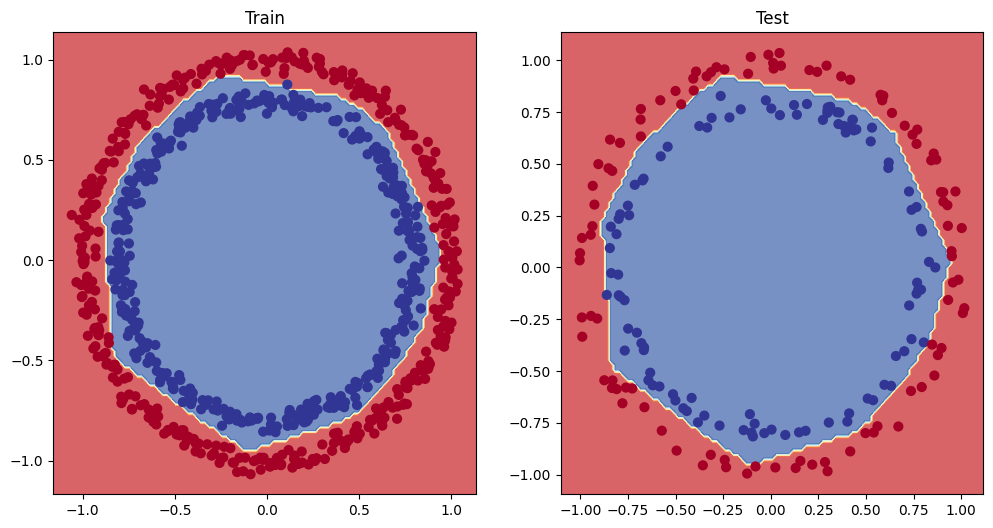

In [47]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

# Metrics using scikit learn

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_true=y_test.cpu(), y_pred=y_preds.cpu())
precision = precision_score(y_true=y_test.cpu(), y_pred=y_preds.cpu())
recall = recall_score(y_true=y_test.cpu(), y_pred=y_preds.cpu())
f1 = f1_score(y_true=y_test.cpu(), y_pred=y_preds.cpu())
print(
    f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1: 1.00


# Multiclass Data

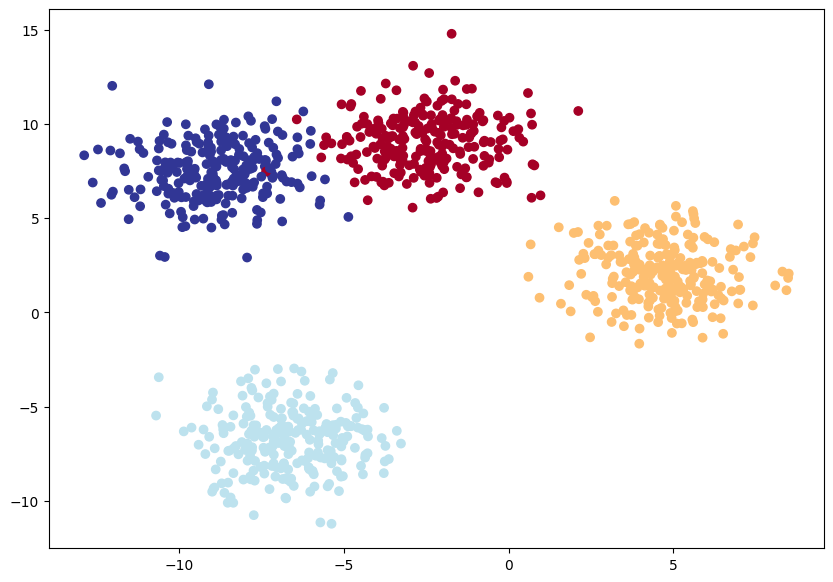

In [49]:
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,  # give the clusters a little shake up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data (visualize, visualize, visualize)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

# Model

In [50]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)


model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [391]:
print(X_blob_train.shape, y_blob_train[:5])
print(torch.unique(y_blob_train))

torch.Size([800, 2]) tensor([1, 0, 2, 2, 0])
tensor([0, 1, 2, 3])


# Loss Function and Optimizer

In [392]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

### Predicting before training model

In [393]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))
print(y_logits[:10])
print(y_blob_test[:10])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]], device='cuda:0')
tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])


In [394]:
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0')
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0')


In [395]:
y_preds = torch.argmax(y_pred_probs, dim=1)
print(y_preds[:10])

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3], device='cuda:0')


### Training and Testing

In [396]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 100
model_4.to(device)
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)
for i in range(epochs+1):
    model_4.train()
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)
    if i % 10 == 0:
        print(
            f"Epoch: {i} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test loss: 0.57861, Test acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test loss: 0.13037, Test acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test loss: 0.07216, Test acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test loss: 0.05133, Test acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test loss: 0.04098, Test acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test loss: 0.03486, Test acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test loss: 0.03083, Test acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test loss: 0.02799, Test acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test loss: 0.02587, Test acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test loss: 0.02423, Test acc: 99.50%
Epoch: 100 | Loss: 0.03185, Acc: 99.12% | Test loss: 0.02293, Test acc: 99.50%


In [397]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
y_logits[:10]

tensor([[  4.3551,  10.3920, -14.9378,  -9.7940],
        [  5.0249, -12.0799,   3.3984,  10.6999],
        [ -5.6139, -13.3927,  21.0484,  12.8084],
        [  1.8479,   7.5879,  -8.6272,  -7.0156],
        [  8.0997,   3.3034, -14.6397,  -3.6309],
        [  5.5958, -15.0054,   5.0344,  13.3266],
        [ -5.9993, -10.2278,  18.9178,   9.9469],
        [  7.0976,  -0.7620,  -9.5784,   0.1726],
        [ -5.6194, -18.6659,  25.6036,  17.6314],
        [  7.3377,   0.7231, -11.2318,  -1.2062]], device='cuda:0')

In [398]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.3832e-03, 9.9762e-01, 9.9621e-12, 1.7071e-09],
        [3.4166e-03, 1.2738e-10, 6.7180e-04, 9.9591e-01],
        [2.6338e-12, 1.1023e-15, 9.9974e-01, 2.6383e-04],
        [3.2043e-03, 9.9680e-01, 9.0463e-08, 4.5329e-07],
        [9.9180e-01, 8.1919e-03, 1.3207e-10, 7.9778e-06],
        [4.3880e-04, 4.9576e-13, 2.5030e-04, 9.9931e-01],
        [1.5085e-11, 2.1987e-13, 9.9987e-01, 1.2704e-04],
        [9.9863e-01, 3.8549e-04, 5.7164e-08, 9.8153e-04],
        [2.7535e-14, 5.9409e-20, 9.9966e-01, 3.4479e-04],
        [9.9847e-01, 1.3386e-03, 8.6032e-09, 1.9443e-04]], device='cuda:0')

In [399]:
y_preds = torch.argmax(y_pred_probs, dim=1)
print(y_preds[:10])
print(y_blob_test[:10])

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')


# Visualizing

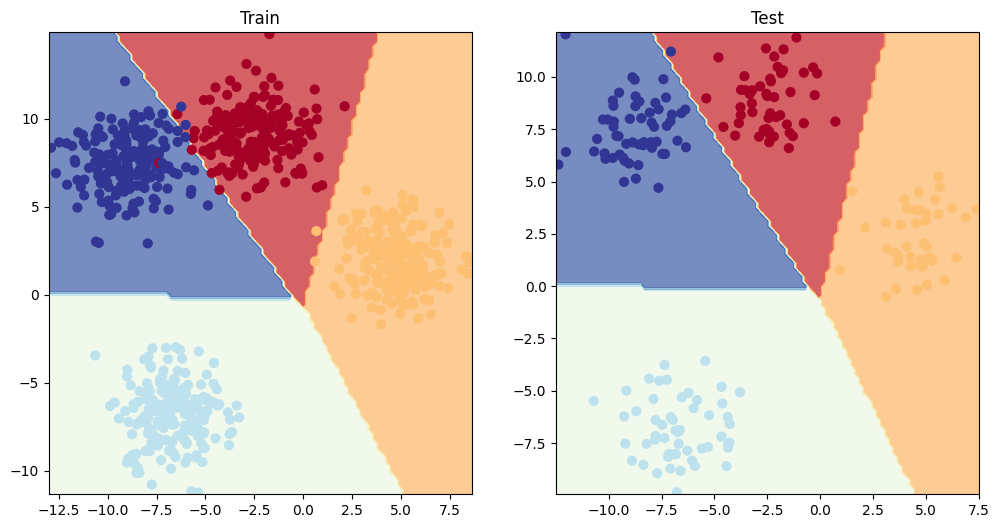

In [400]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

# More metrics libraries

In [401]:
accuracy = accuracy_score(y_true=y_blob_test.cpu(), y_pred=y_preds.cpu())
precision = precision_score(
    y_true=y_blob_test.cpu(), y_pred=y_preds.cpu(), average='weighted')
recall = recall_score(y_true=y_blob_test.cpu(),
                      y_pred=y_preds.cpu(), average='weighted')
f1 = f1_score(y_true=y_blob_test.cpu(),
              y_pred=y_preds.cpu(), average='weighted')
# cm=confusion_matrix(y_true=y_blob_test.cpu(),y_pred=y_preds.cpu())
# print(cm)
print(
    f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

Accuracy: 0.99, Precision: 1.00, Recall: 0.99, F1: 1.00
